In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv('../../data/clean_kc_house_data.csv')
df = df.drop(columns=['Unnamed: 0','date'])

In [3]:
x = df.drop(columns='price')
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 23)

In [135]:
x_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
18108,8161000220,3,2.50,1860,21876,2.0,Average,8 Good,1860,0.0,1992,98014,47.6455,-121.901,2450,21876
20609,9542000075,3,1.75,2000,14733,1.0,Good,8 Good,2000,0.0,1958,98005,47.6001,-122.178,2620,14733
13874,6189200345,4,2.75,2260,12005,1.0,Good,8 Good,2260,0.0,1956,98005,47.6342,-122.171,1870,10800
3279,1433100010,4,1.00,1730,8706,1.0,Good,7 Average,1010,720.0,1962,98058,47.4586,-122.175,1369,8418
10398,3886901795,6,5.00,2850,6600,2.0,Average,7 Average,2850,0.0,1994,98033,47.6813,-122.187,1870,9900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6175,2473530100,4,2.50,2440,7155,2.0,Average,8 Good,2440,0.0,1993,98058,47.4501,-122.126,2450,8109
9704,3630220220,4,3.50,3060,4573,2.0,Average,9 Better,2410,650.0,2012,98029,47.5522,-122.001,3170,3634
11190,4123840310,3,2.50,1810,5192,2.0,Average,8 Good,1810,0.0,1993,98038,47.3724,-122.042,1810,6200
9256,3524039224,4,2.50,3520,6773,2.5,Average,9 Better,2650,870.0,2006,98136,47.5317,-122.391,2930,6458


In [81]:
print(x_train[[*colList]].shape, y_train[[*colList]].shape,)

KeyError: "None of [Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',\n       'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15'],\n      dtype='object')] are in the [index]"

In [83]:
def evaluateModel(X_tr,X_te,y_tr,y_te):
    '''
    Function takes in data, makes a model, and evaluates it.
    '''
    # Create and fit model
    model = sm.OLS(y_tr,sm.add_constant(X_tr)).fit()
    
    # Print sumary (if OLS)
    display(model.summary());
    
    # Grab predictions
    tr_preds = model.predict(sm.add_constant(X_tr))
    te_preds = model.predict(sm.add_constant(X_te))
    
    # Evaluate on train and test
    print("\nEvaluation Statistics:")
    print(f"Train R2 Score: {r2_score(y_tr, tr_preds):.4f}")
    print(f"Train MAE Score: ${mean_absolute_error(y_tr, tr_preds):.4f}")
    print(f"Train RMSE Score: ${mean_squared_error(y_tr, tr_preds, squared=False):.4f}")
    print("*"*20)
    print(f"Test R2 Score: {r2_score(y_te, te_preds):.4f}")
    print(f"Test MAE Score: ${mean_absolute_error(y_te, te_preds):.4f}")
    print(f"Test RMSE Score: ${mean_squared_error(y_te, te_preds, squared=False):.4f}")
    
    # Visualize residuals
    plt.figure(figsize=(9,5))
    plt.scatter(tr_preds, y_tr-tr_preds, label='Train')
    plt.scatter(te_preds, y_te-te_preds, label='Test')
    plt.axhline(y=0, color = 'red', label = '0')
    plt.ticklabel_format(style='plain')
    plt.xlabel('predictions')
    plt.ylabel('residuals')
    plt.legend()
    plt.show();
    
    return

In [84]:
def graphPreds(X_tr,X_te,y_tr,y_te):
    # Visualize predictions
    plt.figure(figsize=(9,5))
    plt.scatter(X_tr,y_tr,label='Train')
    plt.scatter(X_te,y_te,label='Test')
    plt.plot(X_tr, tr_preds, label="Train Line of Best Fit", color='black')
    plt.plot(X_te,te_preds, label="Test Line of Best Fit", color = 'green')
    plt.hlines(y=y_tr.mean(),xmin=X_tr.min(), xmax=X_tr.max(), color='red',label=f'Average: {y_tr.mean():.2f}')
    plt.ylabel('target')
    plt.legend()
    plt.ticklabel_format(style='plain')
    plt.show();

In [97]:
df['grade'].value_counts()

7 Average        8706
8 Good           5909
9 Better         2548
6 Low Average    1955
10 Very Good     1108
11 Excellent      388
5 Fair            227
12 Luxury          88
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [131]:
colList = ['bedrooms','sqft_living','yr_built','condition','grade','bathroom']
catCols = ['condition','grade']

In [139]:
encoder = OneHotEncoder(handle_unknown='error',drop='first',categories='auto')
ct = ColumnTransformer(transformers=[('ohe', encoder, catCols)],remainder='passthrough',sparse_threshold=0)
ct.fit(x_train[[*colList]])
encoded_xtrain = ct.transform(x_train[[*colList]])
encoded_xtest = ct.transform(x_test[[*colList]])

encoded_xtrain = pd.DataFrame(encoded_xtrain,columns=ct.get_feature_names())
encoded_xtest = pd.DataFrame(encoded_xtest,columns=ct.get_feature_names())

In [140]:
encoded_xtrain

,ohe__x0_Fair,ohe__x0_Good,ohe__x0_Poor,ohe__x0_Very Good,ohe__x1_11 Excellent,ohe__x1_12 Luxury,ohe__x1_13 Mansion,ohe__x1_3 Poor,ohe__x1_4 Low,ohe__x1_5 Fair,ohe__x1_6 Low Average,ohe__x1_7 Average,ohe__x1_8 Good,ohe__x1_9 Better,bedrooms,sqft_living,yr_built,bathrooms
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1860.0,1992.0,2.50
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,2000.0,1958.0,1.75
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2260.0,1956.0,2.75
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1730.0,1962.0,1.00
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,2850.0,1994.0,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2440.0,1993.0,2.50
15723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,3060.0,2012.0,3.50
15724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1810.0,1993.0,2.50
15725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,3520.0,2006.0,2.50


In [85]:
colList = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','sqft_living15','sqft_lot15']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                 1.507e+04
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:41:54   Log-Likelihood:            -2.1847e+05
No. Observations:               15727   AIC:                         4.369e+05
Df Residuals:                   15725   BIC:                         4.370e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.931e+04   5157.089     -7.622      0.000   -4.94e+04   -2.92e+04
sqft_living   278.4995      2.268    122.770      0.000     274.053     282.946
==============================================================================
Omnibus:                    11591.708   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           554594.120
Skew:                           3.053   Prob(JB):                         0.00
Kurtosis:                      31.444   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


Evaluation Statistics:
Train R2 Score: 0.4894
Train MAE Score: $172295.7080
Train RMSE Score: $260986.3265
********************
Test R2 Score: 0.5000
Test MAE Score: $177570.4678
Test RMSE Score: $266598.8782


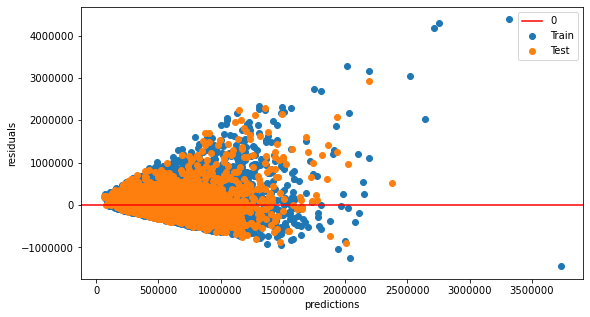

In [87]:
evaluateModel(x_train[['sqft_living']],x_test[['sqft_living']],y_train,y_test)

In [81]:
print(x_train[[*colList]].shape, y_train[[*colList]].shape,)

KeyError: "None of [Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',\n       'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15'],\n      dtype='object')] are in the [index]"

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     2081.
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:43:25   Log-Likelihood:            -2.1807e+05
No. Observations:               15727   AIC:                         4.362e+05
Df Residuals:                   15718   BIC:                         4.362e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.121e+04      1e+04      1.116      0.265   -8487.114    3.09e+04
bedrooms      -5.672e+04   2725.688    -20.809      0.000   -6.21e+04   -5.14e+04
bathrooms      3915.1339   4461.876      0.877      0.380   -4830.655    1.27e+04
sqft_living     189.5131      3.072     61.691      0.000     183.492     195.535
sqft_lot         -0.0439      0.070     -0.623      0.533      -0.182       0.094
floors         1.527e+04   5066.437      3.014      0.003    5338.202    2.52e+04
sqft_above       71.2887      3.095     23.033      0.000      65.222      77.355
sqft_basement   118.2244      3.661     32.293      0.000     111.049     125.400
sqft_living15    71.8729      4.695     15.309      0.000      62.671      81.075
sqft_lot15       -0.7561      0.107     -7.052      0.000      -0.966      -0.546
==============================================================================
Omnibus:                    11820.861   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           630206.878
Skew:                           3.111   Prob(JB):                         0.00
Kurtosis:                      33.381   Cond. No.                     9.76e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.14e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""


Evaluation Statistics:
Train R2 Score: 0.5144
Train MAE Score: $166611.5992
Train RMSE Score: $254529.2652
********************
Test R2 Score: 0.5281
Test MAE Score: $171297.0665
Test RMSE Score: $259014.5451


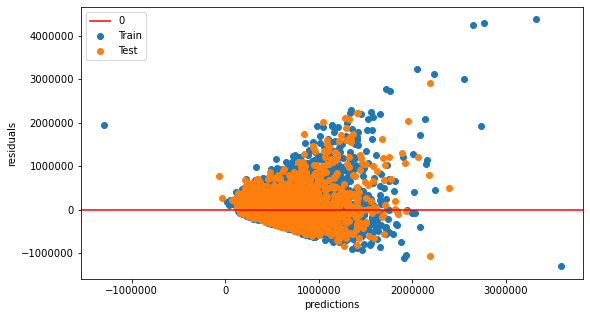

In [88]:
evaluateModel(x_train[[*colList]],x_test[[*colList]],y_train,y_test)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     1675.
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:42:19   Log-Likelihood:            -2.2296e+05
No. Observations:               15727   AIC:                         4.459e+05
Df Residuals:                   15725   BIC:                         4.459e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.308e+05   1.04e+04     12.613      0.000    1.11e+05    1.51e+05
bedrooms    1.214e+05   2966.983     40.929      0.000    1.16e+05    1.27e+05
==============================================================================
Omnibus:                    14551.736   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1246393.496
Skew:                           4.184   Prob(JB):                         0.00
Kurtosis:                      45.802   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Train R2 Score: 0.0963
Train MAE Score: $218155.5286
Train RMSE Score: $347214.3260
********************
Test R2 Score: 0.0951
Test MAE Score: $227307.7115
Test RMSE Score: $358666.5088


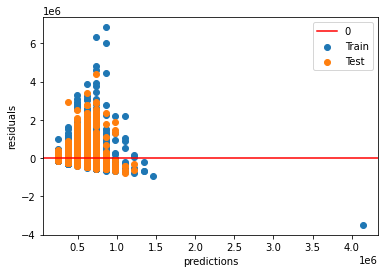

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     6003.
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:42:20   Log-Likelihood:            -2.2121e+05
No. Observations:               15727   AIC:                         4.424e+05
Df Residuals:                   15725   BIC:                         4.424e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.201e+04   7251.012      1.657      0.098   -2199.137    2.62e+04
bathrooms   2.497e+05   3223.161     77.477      0.000    2.43e+05    2.56e+05
==============================================================================
Omnibus:                    13452.046   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           925039.995
Skew:                           3.740   Prob(JB):                         0.00
Kurtosis:                      39.820   Cond. No.                         7.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Train R2 Score: 0.2763
Train MAE Score: $201495.2122
Train RMSE Score: $310719.3345
********************
Test R2 Score: 0.2736
Test MAE Score: $210877.0040
Test RMSE Score: $321354.6236


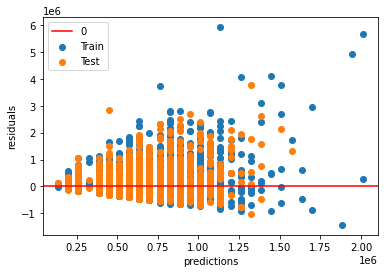

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                 1.507e+04
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:42:20   Log-Likelihood:            -2.1847e+05
No. Observations:               15727   AIC:                         4.369e+05
Df Residuals:                   15725   BIC:                         4.370e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.931e+04   5157.089     -7.622      0.000   -4.94e+04   -2.92e+04
sqft_living   278.4995      2.268    122.770      0.000     274.053     282.946
==============================================================================
Omnibus:                    11591.708   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           554594.120
Skew:                           3.053   Prob(JB):                         0.00
Kurtosis:                      31.444   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Train R2 Score: 0.4894
Train MAE Score: $172295.7080
Train RMSE Score: $260986.3265
********************
Test R2 Score: 0.5000
Test MAE Score: $177570.4678
Test RMSE Score: $266598.8782


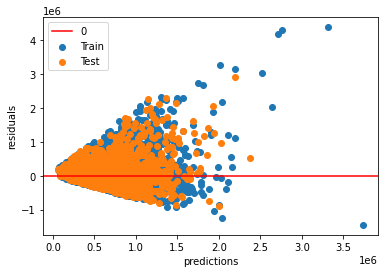

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     138.5
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           7.70e-32
Time:                        14:42:21   Log-Likelihood:            -2.2368e+05
No. Observations:               15727   AIC:                         4.474e+05
Df Residuals:                   15725   BIC:                         4.474e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.274e+05   3090.823    170.632      0.000    5.21e+05    5.33e+05
sqft_lot       0.8309      0.071     11.769      0.000       0.693       0.969
==============================================================================
Omnibus:                    14736.540   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1175993.558
Skew:                           4.305   Prob(JB):                         0.00
Kurtosis:                      44.479   Cond. No.                     4.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Train R2 Score: 0.0087
Train MAE Score: $230771.5221
Train RMSE Score: $363642.8155
********************
Test R2 Score: 0.0035
Test MAE Score: $237430.5876
Test RMSE Score: $376368.3155


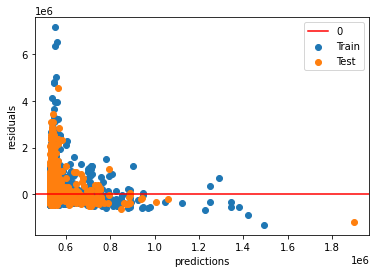

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     1083.
Date:                Tue, 28 Jun 2022   Prob (F-statistic):          7.89e-230
Time:                        14:42:22   Log-Likelihood:            -2.2323e+05
No. Observations:               15727   AIC:                         4.465e+05
Df Residuals:                   15725   BIC:                         4.465e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.828e+05   8305.115     34.055      0.000    2.67e+05    2.99e+05
floors       1.72e+05   5226.527     32.915      0.000    1.62e+05    1.82e+05
==============================================================================
Omnibus:                    14954.733   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1297068.905
Skew:                           4.382   Prob(JB):                         0.00
Kurtosis:                      46.618   Cond. No.                         6.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Train R2 Score: 0.0645
Train MAE Score: $221873.9557
Train RMSE Score: $353274.0289
********************
Test R2 Score: 0.0652
Test MAE Score: $230237.5339
Test RMSE Score: $364542.1570


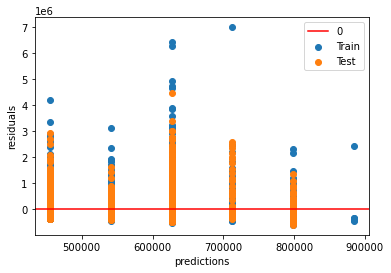

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     9021.
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:42:22   Log-Likelihood:            -2.2019e+05
No. Observations:               15727   AIC:                         4.404e+05
Df Residuals:                   15725   BIC:                         4.404e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.281e+04   5534.500     11.349      0.000     5.2e+04    7.37e+04
sqft_above   266.9584      2.811     94.979      0.000     261.449     272.468
==============================================================================
Omnibus:                    12824.413   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           744299.124
Skew:                           3.517   Prob(JB):                         0.00
Kurtosis:                      35.960   Cond. No.                     4.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Train R2 Score: 0.3645
Train MAE Score: $190131.7064
Train RMSE Score: $291153.3045
********************
Test R2 Score: 0.3657
Test MAE Score: $197821.0962
Test RMSE Score: $300279.2129


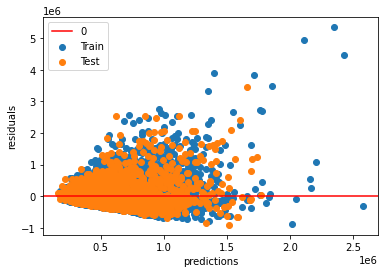

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     1832.
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:42:23   Log-Likelihood:            -2.2289e+05
No. Observations:               15727   AIC:                         4.458e+05
Df Residuals:                   15725   BIC:                         4.458e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           4.62e+05   3303.628    139.856      0.000    4.56e+05    4.69e+05
sqft_basement   266.3935      6.223     42.805      0.000     254.195     278.592
==============================================================================
Omnibus:                    13875.106   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           912401.182
Skew:                           3.958   Prob(JB):                         0.00
Kurtosis:                      39.465   Cond. No.                         636.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Train R2 Score: 0.1044
Train MAE Score: $222524.8609
Train RMSE Score: $345657.9791
********************
Test R2 Score: 0.1091
Test MAE Score: $228707.7773
Test RMSE Score: $355875.3367


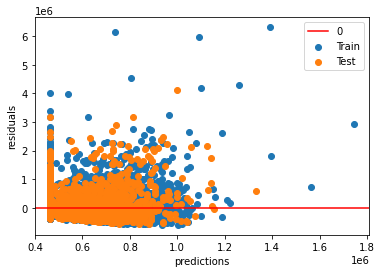

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     8075.
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:42:24   Log-Likelihood:            -2.2049e+05
No. Observations:               15727   AIC:                         4.410e+05
Df Residuals:                   15725   BIC:                         4.410e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.154e+04   7310.350    -11.155      0.000   -9.59e+04   -6.72e+04
sqft_living15   312.7371      3.480     89.863      0.000     305.916     319.559
==============================================================================
Omnibus:                    15612.113   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2007152.514
Skew:                           4.564   Prob(JB):                         0.00
Kurtosis:                      57.586   Cond. No.                     6.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Train R2 Score: 0.3393
Train MAE Score: $184872.5107
Train RMSE Score: $296881.6197
********************
Test R2 Score: 0.3501
Test MAE Score: $191426.1672
Test RMSE Score: $303962.0847


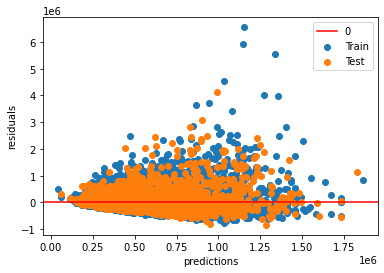

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     123.1
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           1.70e-28
Time:                        14:42:24   Log-Likelihood:            -2.2369e+05
No. Observations:               15727   AIC:                         4.474e+05
Df Residuals:                   15725   BIC:                         4.474e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.248e+05   3205.809    163.718      0.000    5.19e+05    5.31e+05
sqft_lot15     1.1901      0.107     11.095      0.000       0.980       1.400
==============================================================================
Omnibus:                    14728.249   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1171193.156
Skew:                           4.302   Prob(JB):                         0.00
Kurtosis:                      44.391   Cond. No.                     3.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Train R2 Score: 0.0078
Train MAE Score: $231047.4886
Train RMSE Score: $363819.5659
********************
Test R2 Score: 0.0034
Test MAE Score: $237861.5606
Test RMSE Score: $376387.8306


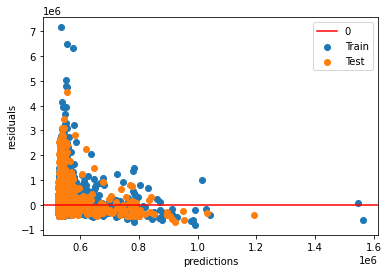

In [12]:
for col in colList:
    evaluateModel(x_train[[col]],x_test[[col]],y_train,y_test)

In [13]:
sinkModel = sm.OLS(y_train,sm.add_constant(x_train[[*colList]])).fit()

NameError: name 'y_pred' is not defined

<Figure size 720x576 with 0 Axes>

<AxesSubplot:>

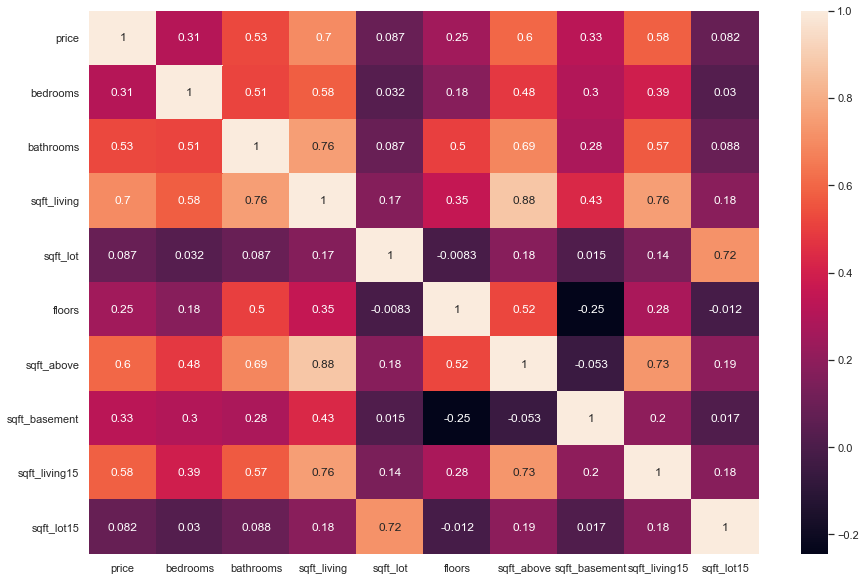

In [6]:
sns.set(rc={'figure.figsize':(15, 10)})

sns.heatmap(data=df[['price',*colList]].corr(),annot=True)

In [7]:
df[[*colList]]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,6,3.00,2400,9373,2.0,2400,0.0,2060,7316
1,4,1.75,2060,26036,1.0,1160,900.0,2590,21891
2,3,1.00,1460,43000,1.0,1460,0.0,2250,20023
3,3,1.00,1430,7599,1.5,1010,420.0,1290,10320
4,4,2.00,1650,3504,1.0,760,890.0,1480,3504
...,...,...,...,...,...,...,...,...,...
20965,5,2.00,1600,4168,1.5,1600,0.0,1190,4168
20966,2,1.00,1040,7372,1.0,840,200.0,1930,5150
20967,3,1.00,1100,4128,1.0,720,380.0,1510,4538
20968,2,1.75,1410,1005,1.5,900,510.0,1440,1188


In [14]:
x_train

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
18108,8161000220,2014-12-27,3,2.50,1860,21876,2.0,Average,8 Good,1860,0.0,1992,98014,47.6455,-121.901,2450,21876
20609,9542000075,2015-03-27,3,1.75,2000,14733,1.0,Good,8 Good,2000,0.0,1958,98005,47.6001,-122.178,2620,14733
13874,6189200345,2014-08-20,4,2.75,2260,12005,1.0,Good,8 Good,2260,0.0,1956,98005,47.6342,-122.171,1870,10800
3279,1433100010,2015-01-28,4,1.00,1730,8706,1.0,Good,7 Average,1010,720.0,1962,98058,47.4586,-122.175,1369,8418
10398,3886901795,2015-04-22,6,5.00,2850,6600,2.0,Average,7 Average,2850,0.0,1994,98033,47.6813,-122.187,1870,9900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6175,2473530100,2014-05-23,4,2.50,2440,7155,2.0,Average,8 Good,2440,0.0,1993,98058,47.4501,-122.126,2450,8109
9704,3630220220,2014-09-23,4,3.50,3060,4573,2.0,Average,9 Better,2410,650.0,2012,98029,47.5522,-122.001,3170,3634
11190,4123840310,2015-01-06,3,2.50,1810,5192,2.0,Average,8 Good,1810,0.0,1993,98038,47.3724,-122.042,1810,6200
9256,3524039224,2014-05-13,4,2.50,3520,6773,2.5,Average,9 Better,2650,870.0,2006,98136,47.5317,-122.391,2930,6458


In [41]:
cat_cols = ['condition','grade']
encoder = OneHotEncoder(handle_unknown='error',drop='first',categories='auto')
ct = ColumnTransformer(transformers=[('ohe', encoder, cat_cols)],remainder='passthrough')
ct.fit(x_train)
x_train_enc = ct.transform(x_train)
x_test_enc = ct.transform(x_train)

scaler = StandardScaler()
scaler.fit(x_train_enc)
x_train_scaled = scaler.transform(x_train_enc)
x_test_scaled = scaler.transform(x_test_enc)
x_train_sc_df = pd.DataFrame(x_train_scaled, columns= ct.get_feature_names())
x_train_sc_df

,ohe__x0_Fair,ohe__x0_Good,ohe__x0_Poor,ohe__x0_Very Good,ohe__x1_11 Excellent,ohe__x1_12 Luxury,ohe__x1_13 Mansion,ohe__x1_3 Poor,ohe__x1_4 Low,ohe__x1_5 Fair,...,floors,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,-0.090941,-0.599409,-0.036566,-0.294226,-0.134144,-0.060312,-0.019536,-0.007974,-0.036566,-0.108504,...,0.937227,0.087854,-0.660617,0.717153,-1.193988,0.610968,2.222481,0.680061,0.338791,-0.520147
1,-0.090941,1.668310,-0.036566,-0.294226,-0.134144,-0.060312,-0.019536,-0.007974,-0.036566,-0.108504,...,-0.917999,0.257334,-0.660617,-0.441738,-1.362106,0.282325,0.253327,0.929958,0.074689,0.438125
2,-0.090941,1.668310,-0.036566,-0.294226,-0.134144,-0.060312,-0.019536,-0.007974,-0.036566,-0.108504,...,-0.917999,0.572081,-0.660617,-0.509908,-1.362106,0.529169,0.303089,-0.172529,-0.070727,0.544767
3,-0.090941,1.668310,-0.036566,-0.294226,-0.134144,-0.060312,-0.019536,-0.007974,-0.036566,-0.108504,...,-0.917999,-0.941128,0.964989,-0.305398,-0.372079,-0.741971,0.274654,-0.908990,-0.158798,-0.624188
4,-0.090941,-0.599409,-0.036566,-0.294226,-0.134144,-0.060312,-0.019536,-0.007974,-0.036566,-0.108504,...,0.937227,1.286316,-0.660617,0.785323,-0.839073,0.870119,0.189347,-0.172529,-0.104004,0.314918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15722,-0.090941,-0.599409,-0.036566,-0.294226,-0.134144,-0.060312,-0.019536,-0.007974,-0.036566,-0.108504,...,0.937227,0.789983,-0.660617,0.751238,-0.372079,-0.803501,0.622988,0.680061,-0.170223,-0.416106
15723,-0.090941,-0.599409,-0.036566,-0.294226,-0.134144,-0.060312,-0.019536,-0.007974,-0.036566,-0.108504,...,0.937227,0.753666,0.806944,1.398854,-0.913792,-0.064416,1.511595,1.738448,-0.335679,0.643469
15724,-0.090941,-0.599409,-0.036566,-0.294226,-0.134144,-0.060312,-0.019536,-0.007974,-0.036566,-0.108504,...,0.937227,0.027326,-0.660617,0.751238,-0.745674,-1.365959,1.220132,-0.260728,-0.240805,-0.540682
15725,-0.090941,-0.599409,-0.036566,-0.294226,-0.134144,-0.060312,-0.019536,-0.007974,-0.036566,-0.108504,...,1.864840,1.044203,1.303657,1.194343,1.084941,-0.212812,-1.260860,1.385652,-0.231266,0.903571


In [42]:
train_df = pd.DataFrame(x_train_enc, columns= ct.get_feature_names())
train_df['target'] = y_train

In [44]:
train_df.corr()['target'].map(abs).sort_values(ascending=False)

target                   1.000000
ohe__x1_9 Better         0.031569
ohe__x1_11 Excellent     0.016739
id                       0.015684
zipcode                  0.013387
ohe__x1_7 Average        0.012785
ohe__x1_8 Good           0.012615
ohe__x1_6 Low Average    0.009009
sqft_living15            0.007796
bathrooms                0.007435
sqft_lot15               0.005065
long                     0.004798
sqft_basement            0.004537
ohe__x1_4 Low            0.004478
ohe__x0_Fair             0.004446
ohe__x1_12 Luxury        0.003394
ohe__x1_5 Fair           0.003029
yr_built                 0.002974
sqft_lot                 0.002905
sqft_living              0.002816
bedrooms                 0.002490
ohe__x1_3 Poor           0.002036
ohe__x1_13 Mansion       0.001499
ohe__x0_Poor             0.001434
ohe__x0_Very Good        0.001352
ohe__x0_Good             0.001192
sqft_above               0.000687
price                    0.000406
floors                   0.000328
lat           

In [56]:
len(y_train)

15727

In [52]:
lr_simple = LinearRegression()
lr_simple.fit(x_train_sc_df[['sqft_living']], y_train)

print(f"Train R2: {lr_simple.score(x_train_sc_df[['sqft_living']], y_train):.4f}")
x_test_sc_df = pd.DataFrame(x_test_scaled, columns= ct.get_feature_names())
print(f"Test R2: {lr_simple.score(x_test_sc_df[['sqft_living']], y_test):.4f}")

Train R2: 0.4894


ValueError: Found input variables with inconsistent numbers of samples: [5243, 15727]